In [1]:
from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, rgb2gray, xyz2lab
from skimage.io import imsave
import numpy as np
import os
import random
import tensorflow as tf

D:\Anaconda3\envs\tensorFlow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Get images
image = img_to_array(load_img('train/timg3.jpg'))
image = np.array(image, dtype=float)

In [3]:
from skimage import transform,data
image = transform.resize(image, (400, 400))

D:\Anaconda3\envs\tensorFlow\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [4]:
X = rgb2lab(1.0/255*image)[:,:,0]
Y = rgb2lab(1.0/255*image)[:,:,1:]
Y /= 128
X = X.reshape(1, 400, 400, 1)
Y = Y.reshape(1, 400, 400, 2)

In [5]:
# Building the neural network
model = Sequential()
model.add(InputLayer(input_shape=(None, None, 1)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))

In [6]:
# Finish model
model.compile(optimizer='adam',loss='mse')

In [7]:
model.fit(x=X, 
    y=Y,
    batch_size=1,
    epochs=1000)

Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 0.3964
Epoch 2/1000
1/1 [==============================] - 1s 854ms/step - loss: 0.3483
Epoch 3/1000
1/1 [==============================] - 1s 984ms/step - loss: 0.1849
Epoch 4/1000
1/1 [==============================] - 1s 814ms/step - loss: 0.0405
Epoch 5/1000
1/1 [==============================] - 1s 880ms/step - loss: 0.0225
Epoch 6/1000
1/1 [==============================] - 1s 854ms/step - loss: 0.0174
Epoch 7/1000
1/1 [==============================] - 1s 981ms/step - loss: 0.0181
Epoch 8/1000
1/1 [==============================] - 1s 774ms/step - loss: 0.0154
Epoch 9/1000
1/1 [==============================] - 1s 811ms/step - loss: 0.0112
Epoch 10/1000
1/1 [==============================] - 1s 714ms/step - loss: 0.0092
Epoch 11/1000
1/1 [==============================] - 1s 701ms/step - loss: 0.0085
Epoch 12/1000
1/1 [==============================] - 1s 953ms/step - loss: 0.0084
Epoch 13/1000
1/1 [=========

Epoch 103/1000
1/1 [==============================] - 1s 1s/step - loss: 0.0023
Epoch 104/1000
1/1 [==============================] - 1s 1s/step - loss: 0.0022
Epoch 105/1000
1/1 [==============================] - 1s 1s/step - loss: 0.0022
Epoch 106/1000
1/1 [==============================] - 1s 1s/step - loss: 0.0022
Epoch 107/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0022
Epoch 108/1000
1/1 [==============================] - 1s 1s/step - loss: 0.0022
Epoch 109/1000
1/1 [==============================] - 1s 1s/step - loss: 0.0022
Epoch 110/1000
1/1 [==============================] - 1s 1s/step - loss: 0.0022
Epoch 111/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0021
Epoch 112/1000
1/1 [==============================] - 1s 1s/step - loss: 0.0021
Epoch 113/1000
1/1 [==============================] - 1s 1s/step - loss: 0.0021
Epoch 114/1000
1/1 [==============================] - 1s 1s/step - loss: 0.0021
Epoch 115/1000
1/1 [====================

Epoch 206/1000
1/1 [==============================] - 1s 1s/step - loss: 0.0013
Epoch 207/1000
1/1 [==============================] - 1s 1s/step - loss: 0.0013
Epoch 208/1000
1/1 [==============================] - 1s 1s/step - loss: 0.0013
Epoch 209/1000
1/1 [==============================] - 1s 1s/step - loss: 0.0013
Epoch 210/1000
1/1 [==============================] - 1s 1s/step - loss: 0.0013
Epoch 211/1000
1/1 [==============================] - 1s 1s/step - loss: 0.0013
Epoch 212/1000
1/1 [==============================] - 1s 1s/step - loss: 0.0013
Epoch 213/1000
1/1 [==============================] - 1s 1s/step - loss: 0.0013
Epoch 214/1000
1/1 [==============================] - 1s 1s/step - loss: 0.0013
Epoch 215/1000
1/1 [==============================] - 1s 1s/step - loss: 0.0013
Epoch 216/1000
1/1 [==============================] - 1s 1s/step - loss: 0.0013
Epoch 217/1000
1/1 [==============================] - 1s 1s/step - loss: 0.0013
Epoch 218/1000
1/1 [====================

Epoch 309/1000
1/1 [==============================] - 1s 1s/step - loss: 9.9578e-04
Epoch 310/1000
1/1 [==============================] - 1s 1s/step - loss: 9.8363e-04
Epoch 311/1000
1/1 [==============================] - 1s 1s/step - loss: 9.7240e-04
Epoch 312/1000
1/1 [==============================] - 1s 1s/step - loss: 9.7540e-04
Epoch 313/1000
1/1 [==============================] - 1s 1s/step - loss: 9.7962e-04
Epoch 314/1000
1/1 [==============================] - 1s 1s/step - loss: 9.7950e-04
Epoch 315/1000
1/1 [==============================] - 1s 1s/step - loss: 9.6756e-04
Epoch 316/1000
1/1 [==============================] - 1s 1s/step - loss: 9.5937e-04
Epoch 317/1000
1/1 [==============================] - 1s 1s/step - loss: 9.5986e-04
Epoch 318/1000
1/1 [==============================] - 1s 1s/step - loss: 9.6098e-04
Epoch 319/1000
1/1 [==============================] - 1s 1s/step - loss: 9.6092e-04
Epoch 320/1000
1/1 [==============================] - 1s 1s/step - loss: 9.5

Epoch 407/1000
1/1 [==============================] - 1s 1s/step - loss: 8.1522e-04
Epoch 408/1000
1/1 [==============================] - 1s 1s/step - loss: 8.0813e-04
Epoch 409/1000
1/1 [==============================] - 1s 1s/step - loss: 7.9977e-04
Epoch 410/1000
1/1 [==============================] - 1s 1s/step - loss: 7.9815e-04
Epoch 411/1000
1/1 [==============================] - 1s 1s/step - loss: 8.0228e-04
Epoch 412/1000
1/1 [==============================] - 1s 1s/step - loss: 8.0230e-04
Epoch 413/1000
1/1 [==============================] - 1s 1s/step - loss: 8.0240e-04
Epoch 414/1000
1/1 [==============================] - 1s 1s/step - loss: 7.9713e-04
Epoch 415/1000
1/1 [==============================] - 1s 1s/step - loss: 7.9289e-04
Epoch 416/1000
1/1 [==============================] - 1s 1s/step - loss: 7.8904e-04
Epoch 417/1000
1/1 [==============================] - 1s 1s/step - loss: 7.8951e-04
Epoch 418/1000
1/1 [==============================] - 1s 1s/step - loss: 7.9

Epoch 505/1000
1/1 [==============================] - 1s 1s/step - loss: 6.9107e-04
Epoch 506/1000
1/1 [==============================] - 1s 1s/step - loss: 6.9077e-04
Epoch 507/1000
1/1 [==============================] - 1s 1s/step - loss: 6.8947e-04
Epoch 508/1000
1/1 [==============================] - 1s 1s/step - loss: 6.8822e-04
Epoch 509/1000
1/1 [==============================] - 1s 1s/step - loss: 6.8725e-04
Epoch 510/1000
1/1 [==============================] - 1s 1s/step - loss: 6.8645e-04
Epoch 511/1000
1/1 [==============================] - 1s 1s/step - loss: 6.8594e-04
Epoch 512/1000
1/1 [==============================] - 1s 1s/step - loss: 6.8450e-04
Epoch 513/1000
1/1 [==============================] - 1s 1s/step - loss: 6.8354e-04
Epoch 514/1000
1/1 [==============================] - 1s 1s/step - loss: 6.8385e-04
Epoch 515/1000
1/1 [==============================] - 1s 1s/step - loss: 6.8218e-04
Epoch 516/1000
1/1 [==============================] - 1s 1s/step - loss: 6.8

Epoch 603/1000
1/1 [==============================] - 1s 1s/step - loss: 6.1637e-04
Epoch 604/1000
1/1 [==============================] - 1s 1s/step - loss: 6.1610e-04
Epoch 605/1000
1/1 [==============================] - 1s 1s/step - loss: 6.1613e-04
Epoch 606/1000
1/1 [==============================] - 1s 1s/step - loss: 6.1679e-04
Epoch 607/1000
1/1 [==============================] - 1s 1s/step - loss: 6.1901e-04
Epoch 608/1000
1/1 [==============================] - 1s 1s/step - loss: 6.2248e-04
Epoch 609/1000
1/1 [==============================] - 1s 1s/step - loss: 6.3098e-04
Epoch 610/1000
1/1 [==============================] - 1s 1s/step - loss: 6.3874e-04
Epoch 611/1000
1/1 [==============================] - 2s 2s/step - loss: 6.4185e-04
Epoch 612/1000
1/1 [==============================] - 1s 1s/step - loss: 6.3535e-04
Epoch 613/1000
1/1 [==============================] - 1s 1s/step - loss: 6.2554e-04
Epoch 614/1000
1/1 [==============================] - 1s 1s/step - loss: 6.1

Epoch 701/1000
1/1 [==============================] - 1s 1s/step - loss: 5.5204e-04
Epoch 702/1000
1/1 [==============================] - 1s 1s/step - loss: 5.5130e-04
Epoch 703/1000
1/1 [==============================] - 1s 993ms/step - loss: 5.5049e-04
Epoch 704/1000
1/1 [==============================] - 1s 1s/step - loss: 5.4984e-04
Epoch 705/1000
1/1 [==============================] - 1s 1s/step - loss: 5.4920e-04
Epoch 706/1000
1/1 [==============================] - 1s 1s/step - loss: 5.4847e-04
Epoch 707/1000
1/1 [==============================] - 1s 1s/step - loss: 5.4788e-04
Epoch 708/1000
1/1 [==============================] - 1s 1s/step - loss: 5.4737e-04
Epoch 709/1000
1/1 [==============================] - 1s 1s/step - loss: 5.4672e-04
Epoch 710/1000
1/1 [==============================] - 1s 1s/step - loss: 5.4622e-04
Epoch 711/1000
1/1 [==============================] - 1s 1s/step - loss: 5.4596e-04
Epoch 712/1000
1/1 [==============================] - 1s 1s/step - loss: 

Epoch 799/1000
1/1 [==============================] - 1s 1s/step - loss: 5.0287e-04
Epoch 800/1000
1/1 [==============================] - 1s 1s/step - loss: 5.0274e-04
Epoch 801/1000
1/1 [==============================] - 1s 1s/step - loss: 5.0008e-04
Epoch 802/1000
1/1 [==============================] - 1s 1s/step - loss: 4.9993e-04
Epoch 803/1000
1/1 [==============================] - 1s 1s/step - loss: 5.0017e-04
Epoch 804/1000
1/1 [==============================] - 1s 1s/step - loss: 4.9918e-04
Epoch 805/1000
1/1 [==============================] - 1s 1s/step - loss: 4.9887e-04
Epoch 806/1000
1/1 [==============================] - 1s 1s/step - loss: 5.0052e-04
Epoch 807/1000
1/1 [==============================] - 1s 1s/step - loss: 4.9978e-04
Epoch 808/1000
1/1 [==============================] - 1s 1s/step - loss: 4.9958e-04
Epoch 809/1000
1/1 [==============================] - 1s 1s/step - loss: 5.0035e-04
Epoch 810/1000
1/1 [==============================] - 1s 1s/step - loss: 5.0

Epoch 897/1000
1/1 [==============================] - 1s 1s/step - loss: 4.8550e-04
Epoch 898/1000
1/1 [==============================] - 1s 1s/step - loss: 4.8560e-04
Epoch 899/1000
1/1 [==============================] - 1s 1s/step - loss: 4.8410e-04
Epoch 900/1000
1/1 [==============================] - 1s 1s/step - loss: 4.8059e-04
Epoch 901/1000
1/1 [==============================] - 1s 1s/step - loss: 4.7974e-04
Epoch 902/1000
1/1 [==============================] - 1s 1s/step - loss: 4.7928e-04
Epoch 903/1000
1/1 [==============================] - 1s 1s/step - loss: 4.7770e-04
Epoch 904/1000
1/1 [==============================] - 1s 1s/step - loss: 4.7772e-04
Epoch 905/1000
1/1 [==============================] - 1s 1s/step - loss: 4.7424e-04
Epoch 906/1000
1/1 [==============================] - 1s 1s/step - loss: 4.7460e-04
Epoch 907/1000
1/1 [==============================] - 1s 1s/step - loss: 4.7206e-04
Epoch 908/1000
1/1 [==============================] - 1s 1s/step - loss: 4.7

Epoch 995/1000
1/1 [==============================] - 1s 1s/step - loss: 4.3700e-04
Epoch 996/1000
1/1 [==============================] - 1s 1s/step - loss: 4.3571e-04
Epoch 997/1000
1/1 [==============================] - 1s 1s/step - loss: 4.3312e-04
Epoch 998/1000
1/1 [==============================] - 1s 1s/step - loss: 4.3404e-04
Epoch 999/1000
1/1 [==============================] - 1s 1s/step - loss: 4.3477e-04
Epoch 1000/1000
1/1 [==============================] - 1s 1s/step - loss: 4.3397e-04


In [8]:
print(model.evaluate(X, Y, batch_size=1))
output = model.predict(X)
output *= 128
# Output colorizations
cur = np.zeros((400, 400, 3))
cur[:,:,0] = X[0][:,:,0]
cur[:,:,1:] = output[0]
imsave("img_result.png", lab2rgb(cur))
imsave("img_gray_version.png", rgb2gray(lab2rgb(cur)))

1/1 [==============================] - 1s 895ms/step
0.00043616537004709244


D:\Anaconda3\envs\tensorFlow\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
D:\Anaconda3\envs\tensorFlow\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


## 上色

In [26]:
from skimage import transform,data
import matplotlib.pyplot as plt


In [42]:
image_x = img_to_array(load_img('test/img1.jpg'))
image_x = np.array(image_x, dtype=float)

In [43]:
ll_1 = len(image_x[1])
ll_2 = len(image_x[2])
print("图片原始维度为({},{})".format(ll_1, ll_2))

图片原始维度为(500,500)


In [44]:
dst = transform.resize(image_x, (400, 400))

D:\Anaconda3\envs\tensorFlow\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


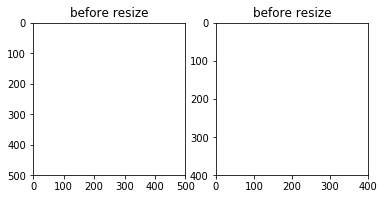

In [45]:
#画图
plt.figure('resize')

plt.subplot(121)
plt.title('before resize')
plt.imshow(image_x,plt.cm.gray)

plt.subplot(122)
plt.title('before resize')
plt.imshow(dst,plt.cm.gray)

plt.show()

In [46]:
X_2 = rgb2lab(1.0/255*dst)[:,:,0]
Y_2 = rgb2lab(1.0/255*dst)[:,:,1:]
Y_2 /= 128
X_2 = X_2.reshape(1, 400, 400, 1)
Y_2 = Y_2.reshape(1, 400, 400, 2)

In [47]:

output = model.predict(X_2)
output *= 128
# Output colorizations
cur = np.zeros((400, 400, 3))
cur[:,:,0] = X_2[0][:,:,0]
cur[:,:,1:] = output[0]
#imsave("img_result_2.png", lab2rgb(cur))
#imsave("img_gray_version_2.png", rgb2gray(lab2rgb(cur)))

In [48]:
#把维度拉回来
dst=transform.resize(cur, (ll_1, ll_2))
imsave("img_result_1.png", lab2rgb(dst))
imsave("img_gray_version_1.png", rgb2gray(lab2rgb(dst)))

D:\Anaconda3\envs\tensorFlow\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
D:\Anaconda3\envs\tensorFlow\lib\site-packages\skimage\io\_io.py:132: UserWarning: img_result_44.png is a low contrast image
  warn('%s is a low contrast image' % fname)
D:\Anaconda3\envs\tensorFlow\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
D:\Anaconda3\envs\tensorFlow\lib\site-packages\skimage\io\_io.py:132: UserWarning: img_gray_version_44.png is a low contrast image
  warn('%s is a low contrast image' % fname)
D:\Anaconda3\envs\tensorFlow\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
